In [175]:
#ELI's NOTEBOOK

In [176]:
import pandas as pd
import sqlite3

In [177]:
con = sqlite3.connect("../im.db")
con

In [178]:
schema = pd.read_sql("SELECT * FROM sqlite_master", con)
schema

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [179]:
TMDBmovies = pd.read_csv("../../zippedData/tmdb.movies.csv.gz")

In [180]:
Movie_budget = pd.read_csv("../../zippedData/tn.movie_budgets.csv.gz")

In [181]:
Movie_gross = pd.read_csv("../../zippedData/bom.movie_gross.csv.gz")

In [182]:
Movie_info = pd.read_csv("../../zippedData/rt.movie_info.tsv.gz", sep = '\t')

In [183]:
Movie_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [184]:
Movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [185]:
Movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [186]:
#making foreign gross above 100 mill and after 2009
type(Movie_gross['foreign_gross'])



pandas.core.series.Series

In [187]:
Movie_gross = Movie_gross.dropna()

In [188]:
Movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [189]:
Movie_gross['foreign_gross'] = Movie_gross['foreign_gross'].str.replace(",","")

<ipython-input-189-cde4eda9b01f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie_gross['foreign_gross'] = Movie_gross['foreign_gross'].str.replace(",","")


In [190]:
MV = Movie_gross['foreign_gross'].astype(float)

In [191]:
MV

0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3275      1500000.0
3286       229000.0
3309       256000.0
3342         5200.0
3353        30000.0
Name: foreign_gross, Length: 2007, dtype: float64

In [192]:
Movie_gross['total_rev'] = MV + Movie_gross['domestic_gross']

<ipython-input-192-a34aef249568>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie_gross['total_rev'] = MV + Movie_gross['domestic_gross']


In [193]:
Movie_gross['total_rev']

0       1.067000e+09
1       1.025500e+09
2       9.603000e+08
3       8.283000e+08
4       7.526000e+08
            ...     
3275    1.501400e+06
3286    9.540000e+05
3309    2.660000e+05
3342    9.840000e+04
3353    7.320000e+04
Name: total_rev, Length: 2007, dtype: float64

In [194]:
#put in descending value
Movie_gross['total_rev'] = Movie_gross['total_rev'].sort_values(ascending = False)

<ipython-input-194-7cb16a7358d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie_gross['total_rev'] = Movie_gross['total_rev'].sort_values(ascending = False)


In [195]:
Movie_gross

,title,studio,domestic_gross,foreign_gross,year,total_rev
0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018,9.840000e+04


In [196]:
Movie_gross = Movie_gross.reset_index()
Movie_gross

,index,title,studio,domestic_gross,foreign_gross,year,total_rev
0,0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...,...
2002,3275,I Still See You,LGF,1400.0,1500000,2018,1.501400e+06
2003,3286,The Catcher Was a Spy,IFC,725000.0,229000,2018,9.540000e+05
2004,3309,Time Freak,Grindstone,10000.0,256000,2018,2.660000e+05
2005,3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018,9.840000e+04


In [197]:
Movie_gross.head(100)

,index,title,studio,domestic_gross,foreign_gross,year,total_rev
0,0,Toy Story 3,BV,415000000.0,652000000,2010,1.067000e+09
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010,1.025500e+09
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010,9.603000e+08
3,3,Inception,WB,292600000.0,535700000,2010,8.283000e+08
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010,7.526000e+08
...,...,...,...,...,...,...,...
95,95,Secretariat,BV,59700000.0,537000,2010,6.023700e+07
96,96,The Ghost Writer,Sum.,15500000.0,44700000,2010,6.020000e+07
97,97,Morning Glory,Par.,31000000.0,29000000,2010,6.000000e+07
98,98,Remember Me,Sum.,19100000.0,37000000,2010,5.610000e+07


In [200]:
#Now we are going to sort the movies by their genre 

In [201]:
TMDBmovies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [202]:
TMDBmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [203]:
#already sorted by popularity 
#find what genres top movies were 
TMDBmovies.head(15)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [204]:
TMDBmovies['genre_ids'] = TMDBmovies['genre_ids'].str.replace("[","").str.replace("]","").str.replace(",","").str.split(" ")

In [205]:
# TMDBmovies['genre_ids'] = TMDBmovies['genre_ids'].apply(lambda x: x[1:-1].split(","))

In [206]:
TMDEXPLODE = TMDBmovies.explode('genre_ids')

In [207]:
TMDEXPLODE['genre_ids'].value_counts()

18       8303
35       5652
99       4965
53       4207
27       3683
28       2612
         2479
10749    2321
878      1762
10751    1565
80       1515
16       1486
12       1400
10402    1267
9648     1237
14       1139
10770    1084
36        622
10752     330
37        205
Name: genre_ids, dtype: int64

In [208]:
TMDEXPLODE["genre_ids"].map

#Hardcode values into dictionary as values for the corresponding keys

<bound method Series.map of 0           12
0           14
0        10751
1           14
1           12
         ...  
26515    10751
26515       12
26515       28
26516       53
26516       27
Name: genre_ids, Length: 47834, dtype: object>

In [209]:
TMDBmovies['genre_ids']

0            [12, 14, 10751]
1        [14, 12, 16, 10751]
2              [12, 28, 878]
3            [16, 35, 10751]
4              [28, 878, 12]
                ...         
26512               [27, 18]
26513               [18, 53]
26514           [14, 28, 12]
26515        [10751, 12, 28]
26516               [53, 27]
Name: genre_ids, Length: 26517, dtype: object

In [210]:
'12' in TMDBmovies['genre_ids'][0]

True

In [211]:
MVG_dict = {'28' : 'Action', '12' :'Adventure', '16' : "Animation", '10751' : "Family", '35' : "Comedy", '80' : "Crime", '99' : "Documentary", 
           "18" : "Drama", "14" : "Fantasy", "36" : "History", '27' : "Horror", '10402' : "Music", '9648' : "Mystery", '10749' : "Romance",
           '878' : "Scifi", '10770' : "TV Movie", '53' : "Thriller", '10752' : "Western", '37' : "War"}

In [212]:
for key in MVG_dict:
    print(key)

28
12
16
10751
35
80
99
18
14
36
27
10402
9648
10749
878
10770
53
10752
37


In [213]:
for key,val in MVG_dict.items():
    print(key, val)

28 Action
12 Adventure
16 Animation
10751 Family
35 Comedy
80 Crime
99 Documentary
18 Drama
14 Fantasy
36 History
27 Horror
10402 Music
9648 Mystery
10749 Romance
878 Scifi
10770 TV Movie
53 Thriller
10752 Western
37 War


In [214]:
#adventure
TMDBmovies['genre_ids'].str.count("12").head(100).sum()

0.0

In [215]:
TMDEXPLODE['genre_ids'] = TMDEXPLODE["genre_ids"].map(MVG_dict)

In [216]:
TMDEXPLODE.dropna(subset= ['genre_ids'])

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,Adventure,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,0,Fantasy,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
0,0,Family,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,Fantasy,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
1,1,Adventure,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
...,...,...,...,...,...,...,...,...,...,...
26515,26515,Family,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,26515,Adventure,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26515,26515,Action,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1
26516,26516,Thriller,309885,en,The Church,0.600,2018-10-05,The Church,0.0,1


In [224]:
T = TMDEXPLODE["genre_ids"].value_counts()

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

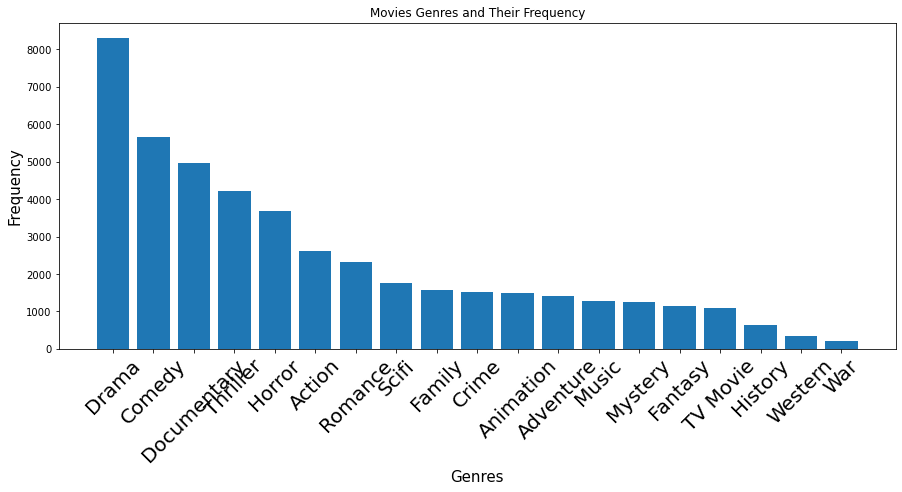

In [227]:
#bar graph showing types of films and then most made
fig, ax = plt.subplots(figsize=(15, 6))

y = T
x = T.index

ax.bar(x, y)
ax.set_title('Movies Genres and Their Frequency')
ax.tick_params(axis="x", labelsize = 20)
ax.set_xlabel("Genres", fontsize = 15)
ax.set_ylabel("Frequency", fontsize = 15)
plt.xticks(rotation = 45)

In [77]:
#Find what genre makes the most money 
#Correlate genres and cash

In [ ]:
add revenue of all a certain genre / its genre count
compare to ther genres to find average rev